In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/bankchurn/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Dropping Irrelevant Attributes

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [9]:
# categorical Variables
categorical_variables = [col for col in data.columns if col in "O"
                        or data[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [10]:
# Numeric Variables
numeric_variables = [col for col in data.columns if data[col].dtype != "object"
                        and data[col].nunique() >11]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

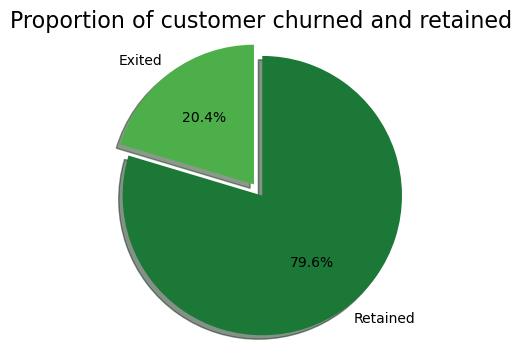

In [11]:
# Calculate the counts of churned and retained customers
churned_count = data[data['Exited'] == 1]['Exited'].count()
retained_count = data[data['Exited'] == 0]['Exited'].count()
labels = ['Exited', 'Retained']
sizes = [churned_count, retained_count]

explode = (0, 0.1)
colors = ['#4daf4a','#1b7837']

# Create a pie chart
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.title("Proportion of customer churned and retained", size=16)
plt.show()


From the pie chart above, it can be seen that from the given 10,000 data points, 20% of the customers have exited the bank whereas nearly 80% have retained their accounts.

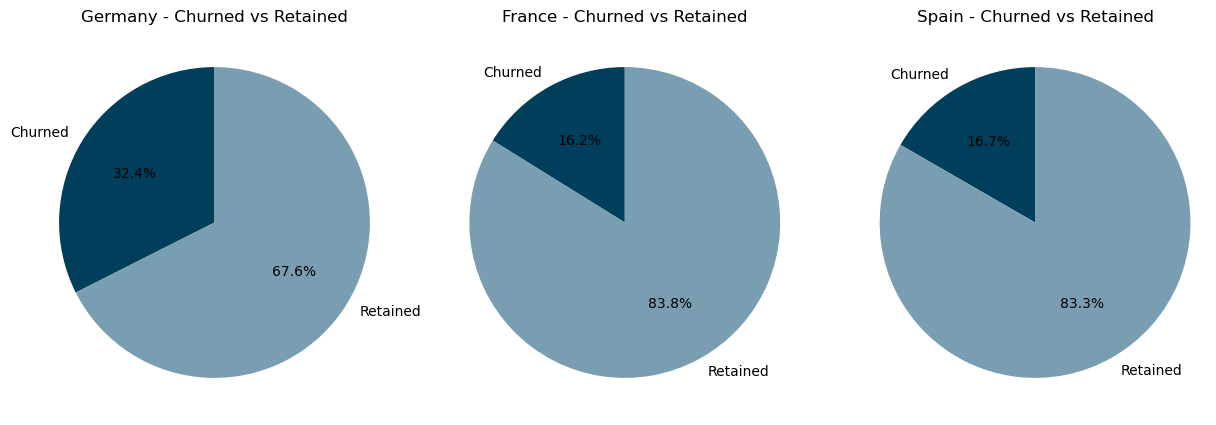

Germany - Churned: 814, Retained: 4204
France - Churned: 810, Retained: 2064
Spain - Churned: 413, Retained: 1695


In [12]:
churned_counts = data[data['Exited'] == 1]['Geography'].value_counts()
retained_counts = data[data['Exited'] == 0]['Geography'].value_counts()

countries = churned_counts.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#003f5c', '#7a9eb1']

for i, country in enumerate(countries):
    churned_value = churned_counts[country]
    retained_value = retained_counts[country]
    axs[i].pie([churned_value, retained_value], labels=['Churned', 'Retained'],
               autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f"{country} - Churned vs Retained")
    axs[i].axis('equal')


plt.show()

for country, churned, retained in zip(countries, churned_counts, retained_counts):
    print(f"{country} - Churned: {churned}, Retained: {retained}")


The above pie chart depicts the percentage of churned customers with respect to their Greography. Based on these numbers, we can make the following observations:

1. Germany has the highest number of retained customers (4,204), indicating a relatively higher customer retention rate compared to the other two countries.

2. France has a significant number of retained customers (2,064), but it also has a substantial number of churned customers (810), suggesting that customer retention efforts may be relatively less effective in France compared to Germany.

3. Spain has the lowest number of both retained and churned customers among the three countries. However, it's important to note that the difference between the churned (413) and retained (1,695) counts is relatively larger compared to Germany and France, indicating a higher churn rate in Spain.

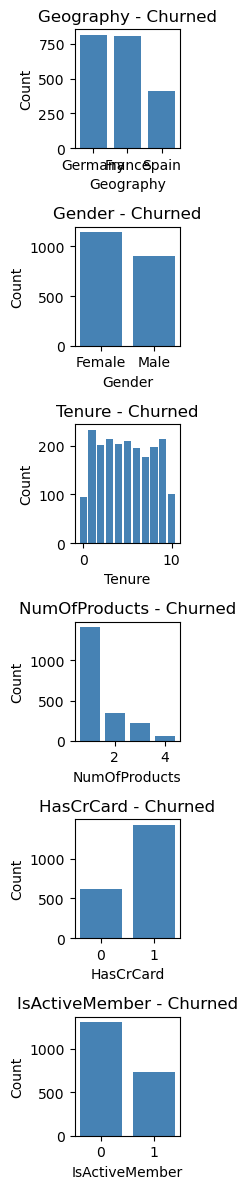

In [13]:
fig, axs = plt.subplots(len(categorical_variables), 1, figsize = (2,2*len(categorical_variables)))
for i, var in enumerate(categorical_variables):
    chur_acc = data[data['Exited'] == 1][var].value_counts()
    axs[i].bar(chur_acc.index, chur_acc.values, color='steelblue')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'{var} - Churned')
plt.tight_layout()
plt.show()

From the above bar plots, it can be inferred that:
1. The number of female customers who churned are greater than the male customers
2. Non active members churned more 
3. Suprisingly, people with credit card churned more
4. Customers with either very low or very high tenure period tend to churn more
5. NumOfProducts doesnt have much effect on the accounts churned. However, for NumOfProducts = 4, the account is guaranteed churned.


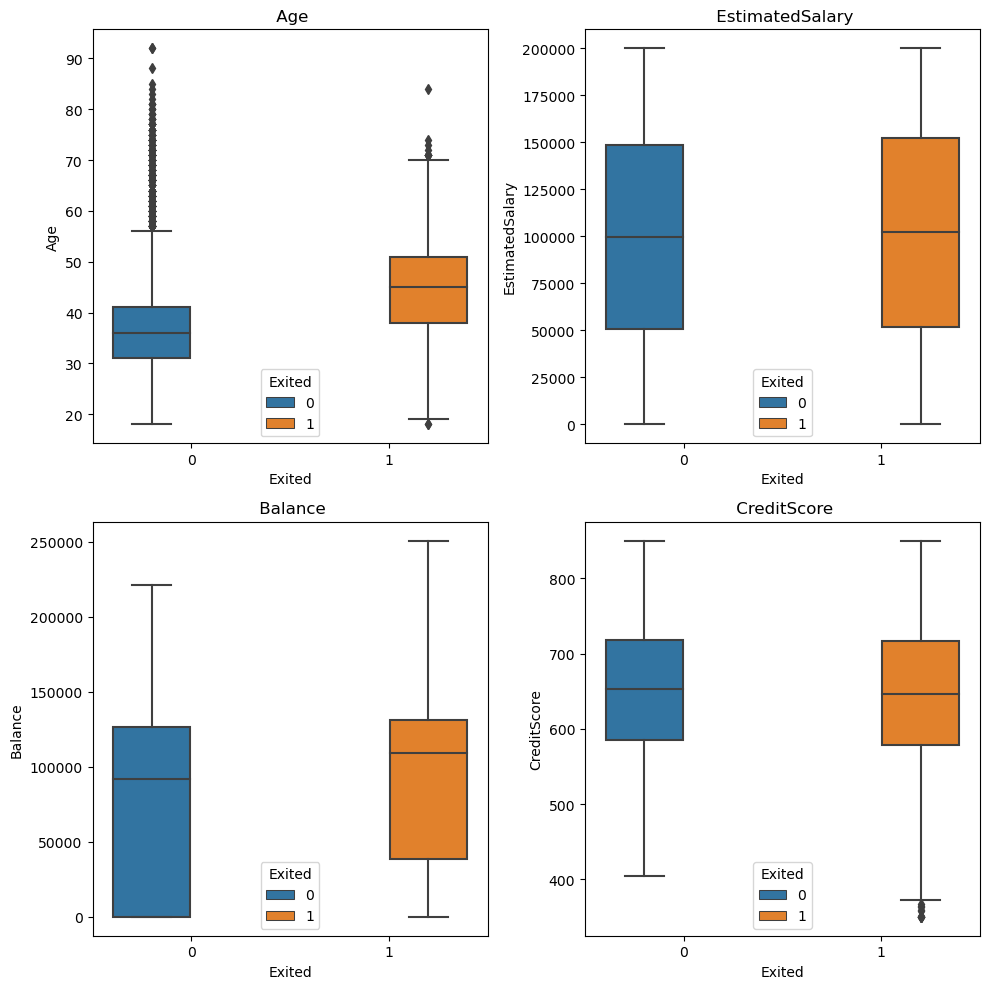

In [14]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
features = ['Age', 'EstimatedSalary', 'Balance', 'CreditScore']
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x='Exited', y=features[k], hue='Exited', data=data, ax = axs[i,j])
        axs[i,j].set_title(f' {features[k]}')
        k +=1 

plt.tight_layout()
plt.show()

From the above boxplots it can be inferred that:
1. Older people tend to churn more
2. Customers with greater balance tend to churn more
3. EstimatedSalary and CreditScore doesn't seem to have much effect on the accounts churned



The above boxplots also inform us that customers with credit score lower than 400 have definitely churned and customers with 4 number of products have always churned. 

# Feature Engineering

# Outliers

Checking for outliers within numeric variables 


In [15]:
print(numeric_variables)

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [16]:
# To determine the threshold value for outliers
def outlier_thresholds(data, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = data[variable].quantile(low_quantile)
    quantile_three = data[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [17]:
# Are there any outliers in the variables
def has_outliers(data, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(data, col)
        if data[(data[col] > up_limit) | (data[col] < low_limit)].any(axis=None):
            number_of_outliers = data[(data[col] > up_limit) | (data[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(x=data[col])
                plt.show()
    

In [18]:
# Loop to check for outlier within each numeric_variable list 
for var in numeric_variables:
    print(var, "has " , has_outliers(data, [var]),  "Outliers")


CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


In [19]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Conclusion: There are no outliers. 

# Feature Engineering

In [20]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering for numeric variables
def engineer_numeric_features(data):
    
    # Standardization of numeric variables (e.g., age, estimated_salary, balance, creditScore)
    scaler = StandardScaler()
    data[numeric_variables] = scaler.fit_transform(data[numeric_variables])
    # Performs quantile-based binning of the 'CreditScore' variable into discrete categories.
    data["NewCreditsScore"] = pd.qcut(data['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])

    return data

data = engineer_numeric_features(data)

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewCreditsScore
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1,3
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0,2
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0,5
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0,6


In [22]:
# Feature engineering for categorical variables
def engineer_categorical_features(data):
    # One-hot encoding for categorical variables (Gender, Geography)
    list = ["Gender", "Geography"]
    data = pd.get_dummies(data, columns =list, drop_first = True)
    return data

data = engineer_categorical_features(data)


In [23]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewCreditsScore,Gender_Male,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,3,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,2,0,0,1
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,5,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,6,0,0,1


# Scaling # 

The robust_scaler method is a function that performs scaling on numerical data using statistics that are robust to outliers. It aims to normalize the values of a given variable by subtracting the median and dividing by the interquartile range (IQR). The IQR is a measure of the spread of the data that is resistant to extreme values, making it suitable for handling datasets with outliers.

The function takes a variable as input and calculates the median, first quartile (25th percentile), third quartile (75th percentile), and the corresponding IQR. It then checks the value of the IQR and performs the scaling operation accordingly. If the IQR is zero, indicating a low dispersion of values, the function adjusts the quartile values using different quantiles (0.01, 0.99, 0.05, and 0.95) to ensure a non-zero IQR.

After determining the appropriate quartile values and IQR, the function applies the scaling formula (variable - median) / IQR to each value in the variable. The result is rounded to three decimal places and returned as the scaled variable.

In [24]:
def robust_scaler(variable):
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1

    if interquantile_range == 0:
        quartile1 = variable.quantile(0.01)
        quartile3 = variable.quantile(0.99)
        interquantile_range = quartile3 - quartile1
    elif interquantile_range == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1

    z = (variable - variable.median()) / interquantile_range
    
    return round(z, 3)

The code below identifies columns in the data DataFrame that have a low number of unique values or are not of object data type. It then applies the robust_scaler function to scale the remaining columns, effectively normalizing the numerical features.

In [25]:
no_scale_cols = [col for col in data.columns if data[col].dtypes != 'O' and len(data[col].value_counts()) <= 10]
print(no_scale_cols)

need_scale_cols = [col for col in data.columns if col not in no_scale_cols]
print(need_scale_cols)

data[need_scale_cols] = data[need_scale_cols].apply(lambda x: robust_scaler(x))

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'NewCreditsScore', 'Gender_Male', 'Geography_Germany', 'Geography_Spain']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [26]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewCreditsScore,Gender_Male,Geography_Germany,Geography_Spain
0,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,3,0,0,0
1,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,2,0,0,1
2,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,1,0,0,0
3,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,5,0,0,0
4,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,6,0,0,1


# Modelling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score



In [28]:
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
NewCreditsScore      0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [29]:
X = data.drop("Exited",axis=1)
y = data["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=1000)),
          ('DTC', DecisionTreeClassifier(random_state=7800)),
          ('RFC', RandomForestClassifier(random_state=7800)),
          ('KNN', KNeighborsClassifier()),
          ('SVR', SVC(gamma='auto', random_state=1000)),
          ('GB', GradientBoostingClassifier(random_state=1000)),
          ('LightGBM', LGBMClassifier(random_state=1000))]



In [30]:
for idx, (name, model) in enumerate(models):
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    mean_score = cv_results.mean()
    std_score = cv_results.std()
    print(f"Model {idx + 1}: {name}")
    print(f"Accuracy score: {mean_score:.4f}")
    print(f"Standard deviation: {std_score:.4f}")
    print()

Model 1: LR
Accuracy score: 0.8095
Standard deviation: 0.0081

Model 2: DTC
Accuracy score: 0.7910
Standard deviation: 0.0131

Model 3: RFC
Accuracy score: 0.8634
Standard deviation: 0.0054

Model 4: KNN
Accuracy score: 0.8291
Standard deviation: 0.0097

Model 5: SVR
Accuracy score: 0.8552
Standard deviation: 0.0086

Model 6: GB
Accuracy score: 0.8652
Standard deviation: 0.0084

Model 7: LightGBM
Accuracy score: 0.8632
Standard deviation: 0.0078



# Model Tuning for RFC, GB, LightGBM

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Define the models and their respective parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=1000), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=1000), {
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7]
    }),
    'LightGBM': (LGBMClassifier(random_state=1000), {
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7]
    })
}

# Perform randomized search for each model
results = {}
for model_name, (model, param_grid) in models.items():
    random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10)
    random_search.fit(X_train, y_train)
    
    # Store the best parameters and the corresponding score for the model
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    results[model_name] = {'Best Parameters': best_params, 'Best Score': best_score}

# Print the results
for model_name, result in results.items():
    print(f"{model_name}:")
    print("Best Parameters:", result['Best Parameters'])
    print("Best Score:", result['Best Score'])
    print()



Random Forest:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}
Best Score: 0.865625

Gradient Boosting:
Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.86625

LightGBM:
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.866125



Note: We see that based on best score, the best model is Gradient Boosting

In [32]:
# Train the GB_model with the best parameters on the entire training data
gb_model = GradientBoostingClassifier()
gb_params = {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
gb_model.set_params(**gb_params)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)


In [33]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Gradient Boosting Model : ", accuracy)

Accuracy of Gradient Boosting Model :  0.8575


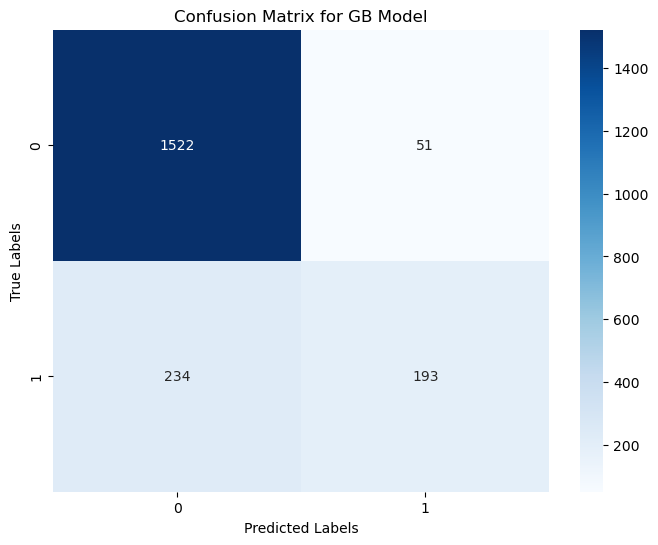

In [34]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for GB Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Conclusion: 

The Gradient Bossting Model gives 85.75% accuracy. From the confusion matrix, it can be seen that there are 234 instances of false negatives which causes are model to only have 85.75% accuracy. Additional feature scaling and model tuning is required to improve the performance